In [2]:
import pandas as pd
import numpy as np
dt =pd.read_excel('C:\\Users\\Chetan\\OneDrive\\Documents\\lab1ML\\19CSE305_LabData_Set3.1.xlsx',sheet_name='thyroid0387_UCI')
dt

,RecordID,age,sex,onthyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,...,TT4measured,TT4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referralsource,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NOCONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NOCONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NOCONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NOCONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148.0,t,1.44,t,103.0,f,NaN,STMW,NOCONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,NaN,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,NaN,f,NaN,f,NaN,t,30.0,other,NOCONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201.0,t,0.84,t,240.0,f,NaN,SVI,AK


In [3]:
data_type={}
x={}
column_names=dt.select_dtypes(include=['float64','int64'])
column_names=list(column_names)
i=0
columns=dt.columns
for column in column_names:
    x[column]=[dt[column].min(),dt[column].max()]
    i+=1

for column in  columns:
    if column in column_names:
        data_type[column]='quantitative'
    else:
        data_type[column]='categorical'
print(data_type)
print("")
print(x)

{'RecordID': 'quantitative', 'age': 'quantitative', 'sex': 'categorical', 'onthyroxine': 'categorical', 'queryonthyroxine': 'categorical', 'onantithyroidmedication': 'categorical', 'sick': 'categorical', 'pregnant': 'categorical', 'thyroidsurgery': 'categorical', 'I131treatment': 'categorical', 'queryhypothyroid': 'categorical', 'queryhyperthyroid': 'categorical', 'lithium': 'categorical', 'goitre': 'categorical', 'tumor': 'categorical', 'hypopituitary': 'categorical', 'psych': 'categorical', 'TSHmeasured': 'categorical', 'TSH': 'quantitative', 'T3measured': 'categorical', 'T3': 'quantitative', 'TT4measured': 'categorical', 'TT4': 'quantitative', 'T4Umeasured': 'categorical', 'T4U': 'quantitative', 'FTImeasured': 'categorical', 'FTI': 'quantitative', 'TBGmeasured': 'categorical', 'TBG': 'quantitative', 'referralsource': 'categorical', 'Condition': 'categorical'}

{'RecordID': [840801013, 841031032], 'age': [1, 97], 'TSH': [0.05, 430.0], 'T3': [0.05, 8.599999], 'TT4': [3.0, 359.0], 'T4U

In [4]:
nnull={}
for column in column_names:
    nnull[column]=dt[column].isna().sum()
print(nnull)

{'RecordID': 0, 'age': 0, 'TSH': 115, 'T3': 202, 'TT4': 40, 'T4U': 98, 'FTI': 98, 'TBG': 964}


In [5]:
variance={}
mean={}
column_names=dt.select_dtypes(include=['float64','int64'])

for column in column_names:
    variance[column] = np.var(dt[column])
    mean[column]=np.mean(dt[column])
print(variance)
mean

{'RecordID': 5813938991.469424, 'age': 352.205919, 'TSH': 864.3683599958953, 'T3': 0.6494457033603758, 'TT4': 1737.3178072482638, 'T4U': 0.0427871913117438, 'FTI': 3829.094722051514, 'TBG': 63.388233965277806}


{'RecordID': 840934027.976,
 'age': 51.509,
 'TSH': 6.5596384079096035,
 'T3': 1.8222431065162907,
 'TT4': 106.44770833333334,
 'T4U': 0.972039911308204,
 'FTI': 114.60088691796008,
 'TBG': 26.23055552777778}

In [6]:
import math

outliers={}
for column in column_names:
    count=0
    for a in dt[column]:
        z=(a-mean[column])/math.sqrt(variance[column])
        if z<0:
            z*=-1
        if z>3:
            count+=1
    if count >0:
        outliers[column]='yes'
    else:
        outliers[column]='no'
print(outliers)

    

{'RecordID': 'no', 'age': 'no', 'TSH': 'yes', 'T3': 'yes', 'TT4': 'yes', 'T4U': 'yes', 'FTI': 'yes', 'TBG': 'yes'}


In [7]:
for column in dt.columns:
    if column in column_names :
        if outliers[column]=='yes':
            dt[column].fillna(dt[column].median(), inplace=True)
        else:
            dt[column].fillna(dt[column].mean(), inplace=True)
    else:
        dt[column].fillna(dt[column].mode(), inplace=True)

dt
    

,RecordID,age,sex,onthyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,...,TT4measured,TT4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referralsource,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,103.0,f,0.96,f,106.0,f,25.5,other,NOCONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,106.0,f,25.5,other,NOCONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,103.0,f,0.96,f,106.0,t,11.0,other,NOCONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,103.0,f,0.96,f,106.0,t,26.0,other,NOCONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,103.0,f,0.96,f,106.0,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148.0,t,1.44,t,103.0,f,25.5,STMW,NOCONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,25.5,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,103.0,f,0.96,f,106.0,t,30.0,other,NOCONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201.0,t,0.84,t,240.0,f,25.5,SVI,AK


In [8]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler=StandardScaler()
dt[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']] = Standard_Scaler.fit_transform(dt[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']])
dt

,RecordID,age,sex,onthyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,...,TT4measured,TT4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referralsource,Condition
0,840801013,-1.199383,F,f,f,f,f,f,f,f,...,f,-0.081034,f,-0.055271,f,-0.131883,f,25.5,other,NOCONDITION
1,840801014,-1.199383,F,f,f,f,f,f,f,f,...,t,0.531042,f,-0.055271,f,-0.131883,f,25.5,other,NOCONDITION
2,840801042,-0.559968,F,f,f,f,f,f,f,f,...,f,-0.081034,f,-0.055271,f,-0.131883,t,11.0,other,NOCONDITION
3,840803046,-0.826391,F,f,f,f,f,f,f,f,...,f,-0.081034,f,-0.055271,f,-0.131883,t,26.0,other,NOCONDITION
4,840803047,-1.039529,F,f,f,f,f,f,f,f,...,f,-0.081034,f,-0.055271,f,-0.131883,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,-0.559968,F,f,f,f,f,f,f,f,...,t,1.020703,t,2.387648,t,-0.182881,f,25.5,STMW,NOCONDITION
996,841031010,-0.559968,F,f,f,f,f,f,f,f,...,t,-2.365302,t,2.489436,t,-1.821640,f,25.5,other,F
997,841031030,-1.678944,F,f,f,f,f,t,f,f,...,f,-0.081034,f,-0.055271,f,-0.131883,t,30.0,other,NOCONDITION
998,841031031,-1.678944,F,f,f,f,f,f,f,f,...,t,2.318304,t,-0.666001,t,2.146060,f,25.5,SVI,AK


In [12]:
binary_attributes = ['onthyroxine', 'queryonthyroxine', 'onantithyroidmedication','sick', 'pregnant', 'thyroidsurgery', 'I131treatment', 'queryhypothyroid','queryhyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary','psych','TSHmeasured','T3measured','T4Umeasured','FTImeasured','TBGmeasured']
v1=[]
v2=[]
f11=0
f01=0
f10=0
f00=0
for column  in binary_attributes :
    if dt.loc[0, column] == 'f':
        v1.append(0)
    else:
        v1.append(1)
    if dt.loc[1, column] == 'f':
        v2.append(0)
    else:
        v2.append(1)
    if dt.loc[0, column] == 'f' and dt.loc[1, column] == 'f':
        f00+=1
    elif dt.loc[0, column] == 'f' and dt.loc[1, column] == 't':
        f01+=1
    elif dt.loc[0, column] == 't'and dt.loc[1, column] == 't':
        f11+=1
    else:
        f10+=1
        

if f01 + f10 + f11 != 0:
    jc = f11 / (f01 + f10 + f11)
else:
    jc = 0.0  

if f00 + f01 + f10 + f11 != 0:
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)
else:
    smc = 0.0 
print(jc)
print (smc)

0.3333333333333333
0.8947368421052632


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
v1_array = np.array(v1).reshape(1, -1)
v2_array = np.array(v2).reshape(1, -1)
cosine_sim = cosine_similarity(v1_array, v2_array)
cosine_sim

array([[0.5]])

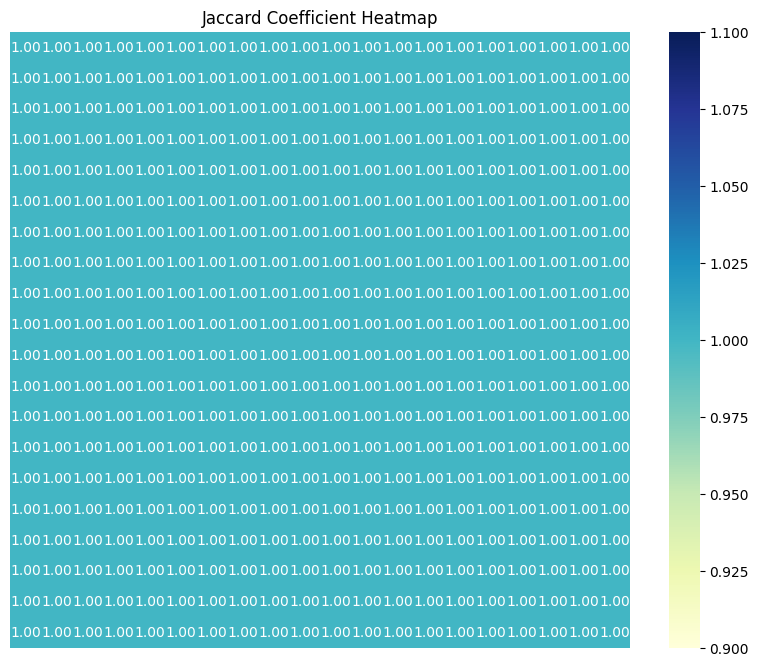

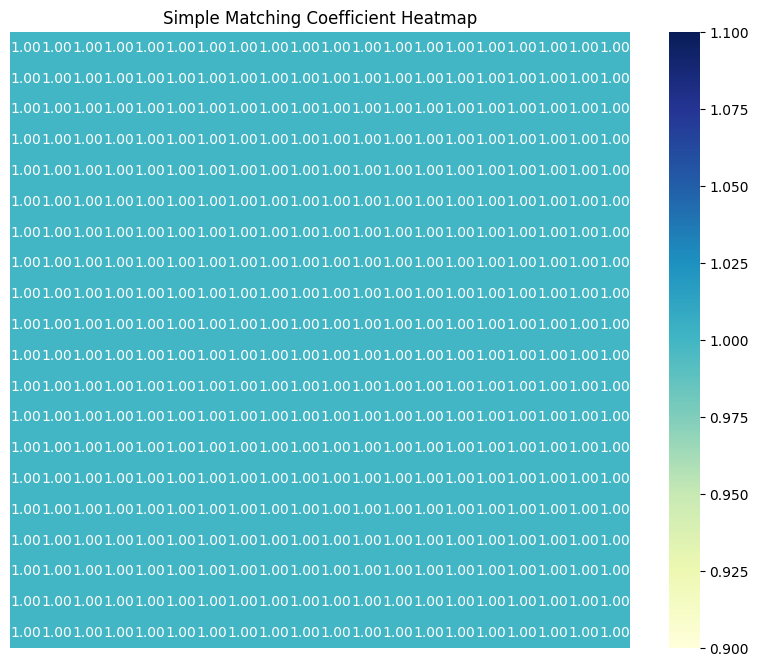

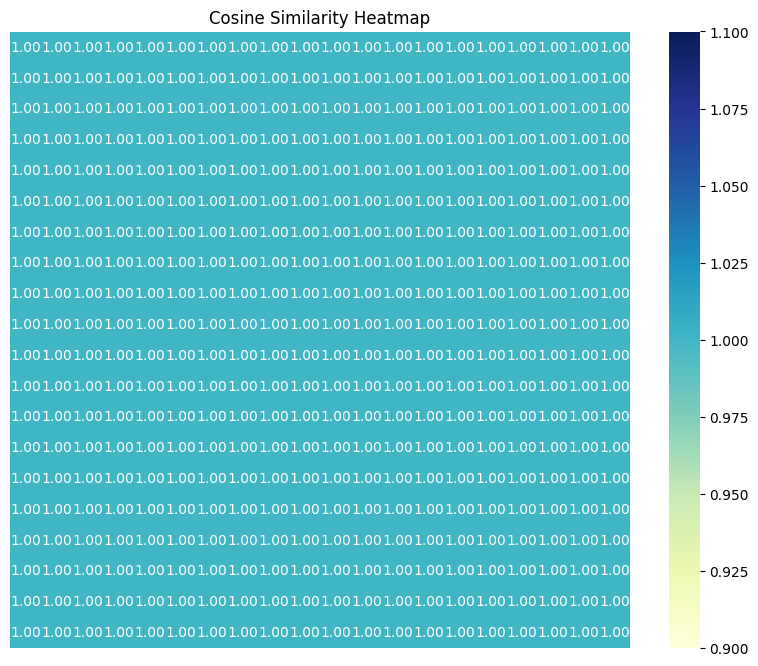

In [16]:
vectors = dt.iloc[:20, 1:-1]  

def jaccard_coefficient(vector1, vector2):
    intersection = np.logical_and(vector1, vector2)
    union = np.logical_or(vector1, vector2)
    return np.sum(intersection) / np.sum(union)

jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        vector1 = vectors.iloc[i].astype(bool)
        vector2 = vectors.iloc[j].astype(bool)
        jc_matrix[i, j] = jaccard_coefficient(vector1, vector2)
        smc_matrix[i, j] = jaccard_score(vector1, vector2, average='binary')
        cosine_matrix[i, j] = cosine_similarity([vector1], [vector2])[0, 0]

plt.figure(figsize=(10, 8))
sns.heatmap(jc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient Heatmap")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(smc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient Heatmap")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap")
plt.show()
